In [21]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import pandas as pd
import numpy as np
from scipy.spatial import distance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA

In [38]:
dataset = pd.read_csv("./total.csv")
dataset.head()

,ID,latent_space_0,latent_space_1,latent_space_2,latent_space_3,latent_space_4,latent_space_5,latent_space_6,anomaly,y_hat_latent_space_0,y_hat_latent_space_1,y_hat_latent_space_2,y_hat_latent_space_3,y_hat_latent_space_4,y_hat_latent_space_5,y_hat_latent_space_6
0,200.0,0.435341,-0.548701,0.219728,-0.293924,-0.327859,-0.234788,0.216090,0,0.211074,-0.543295,0.222157,-0.034048,-0.454977,-0.235163,0.249272
1,201.0,0.130174,-0.451719,0.325061,-0.093697,-0.861415,-0.319338,0.142828,0,0.101639,-0.438303,0.278842,-0.028266,-0.835308,-0.287276,0.185812
2,202.0,0.093049,-0.373697,0.287850,-0.017417,-0.809690,-0.383129,0.090053,0,0.100282,-0.375407,0.282706,-0.013414,-0.816674,-0.348275,0.116948
3,203.0,0.055119,-0.276009,0.258911,-0.002806,-0.746050,-0.443000,0.059821,0,0.060221,-0.295059,0.261399,0.008664,-0.751295,-0.414880,0.076788
4,204.0,0.020952,-0.182226,0.211561,0.011079,-0.668836,-0.499843,0.039456,0,0.023399,-0.202114,0.223526,0.014928,-0.677177,-0.480439,0.048368


In [7]:
total = y.merge(y_hat, left_on='ID', right_on='ID')
total.head()

,Unnamed: 0_x,ID,sine_signal mu predicted_x,sawtooth_signal mu predicted_x,latent_space_0,latent_space_1,latent_space_2,latent_space_3,latent_space_4,latent_space_5,...,Unnamed: 0_y,sine_signal mu predicted_y,sawtooth_signal mu predicted_y,y_hat_latent_space_0,y_hat_latent_space_1,y_hat_latent_space_2,y_hat_latent_space_3,y_hat_latent_space_4,y_hat_latent_space_5,y_hat_latent_space_6
0,100,200.0,-0.049047,-0.759869,0.435341,-0.548701,0.219728,-0.293924,-0.327859,-0.234788,...,0,-0.098082,-0.606751,0.211074,-0.543295,0.222157,-0.034048,-0.454977,-0.235163,0.249272
1,101,201.0,0.184273,-1.507484,0.130174,-0.451719,0.325061,-0.093697,-0.861415,-0.319338,...,1,0.055531,-1.313694,0.101639,-0.438303,0.278842,-0.028266,-0.835308,-0.287276,0.185812
2,102,202.0,0.380385,-1.345762,0.093049,-0.373697,0.287850,-0.017417,-0.809690,-0.383129,...,2,0.283976,-1.351027,0.100282,-0.375407,0.282706,-0.013414,-0.816674,-0.348275,0.116948
3,103,203.0,0.572868,-1.161470,0.055119,-0.276009,0.258911,-0.002806,-0.746050,-0.443000,...,3,0.498016,-1.168659,0.060221,-0.295059,0.261399,0.008664,-0.751295,-0.414880,0.076788
4,104,204.0,0.703928,-0.965978,0.020952,-0.182226,0.211561,0.011079,-0.668836,-0.499843,...,4,0.668567,-0.981007,0.023399,-0.202114,0.223526,0.014928,-0.677177,-0.480439,0.048368


In [39]:
latent_space_y = dataset.iloc[:,1:8]

In [40]:
pca = PCA(n_components=3)
columns = []
for i in range(3):
    columns.append("y_pc"+str(i))
principalComponents = pca.fit_transform(latent_space_y)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = dataset["anomaly"]
ls_y = pd.concat([principalDf, status], axis = 1)
ls_y.head()

,y_pc0,y_pc1,y_pc2,anomaly
0,0.743425,0.044108,0.462476,0
1,0.767744,-0.070632,0.321040,0
2,0.655753,-0.156062,0.285302,0
3,0.557878,-0.226692,0.219001,0
4,0.451923,-0.288605,0.153464,0


In [41]:
latent_space_yhat = dataset.iloc[:,9:17]

In [42]:
pca = PCA(n_components=3)
columns = []
for i in range(3):
    columns.append("y_hatpc"+str(i))
principalComponents = pca.fit_transform(latent_space_yhat)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
finalDf = pd.concat([principalDf, ls_y], axis = 1)
finalDf.head()

,y_hatpc0,y_hatpc1,y_hatpc2,y_pc0,y_pc1,y_pc2,anomaly
0,-0.147518,0.550038,0.459834,0.743425,0.044108,0.462476,0
1,-0.079161,0.737624,0.375219,0.767744,-0.070632,0.321040,0
2,0.020381,0.719039,0.341675,0.655753,-0.156062,0.285302,0
3,0.113393,0.632938,0.292063,0.557878,-0.226692,0.219001,0
4,0.201188,0.540834,0.219819,0.451923,-0.288605,0.153464,0


In [43]:
distance_df = pd.DataFrame(columns=["distance LS", "anomaly"])

In [15]:
for index, word in dataset.iterrows():
    y = word.iloc[1:8].values
    y_hat = word.iloc[9:17].values
    distance_pair = distance.euclidean(y, y_hat)
    df = pd.DataFrame({"distance LS": [distance_pair], "anomaly":[word.anomaly]})
    distance_df = distance_df.append(df)

In [16]:
distance_df.head()

,distance LS,anomaly
0,0.367596,0.0
0,0.104733,0.0
0,0.045657,0.0
0,0.040408,0.0
0,0.032940,0.0


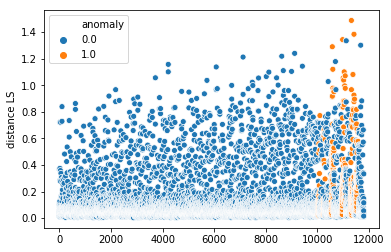

In [20]:
ax = sns.scatterplot(x=range(distance_df.shape[0]), y="distance LS", hue="anomaly", data=distance_df)